# Get and Analysis the result of Google Trends with Python

[Google Trends (Google搜尋趨勢)](https://trends.google.com/trends/trendingsearches/daily?geo=US)
是由Google 提供的線上搜尋趨勢服務，可以簡單的看出最近哪些`關鍵字`是熱門的。
但大規模分析 `Google Trends` 是很麻煩不切實際的，且有時候連打開網頁都懶，
那麼我們如何才能有夠有效的使用`Google Trends`呢？

- [pytrends](https://github.com/GeneralMills/pytrends):
    
    Unofficial API for Google Trends
    
    ```
    Allows simple interface for automating downloading of reports from Google Trends. 
    Only good until Google changes their backend again :-P. When that happens feel free to contribute!
    ```
    
    這是一個非官方支援的API，允許從`Google Trends`下載資料（爬蟲）
   

## Install `pytrends` package

In [1]:
!pip3 install pytrends

## Connect to Google

- [Pandas](https://pandas.pydata.org/):
    
    Python Data Analysis Library

In [2]:
import pandas as pd
from pytrends.request import TrendReq

pytrend = TrendReq()

## Build Payload 

設定我們想要搜尋的關鍵字、類別、時間區段、地區以及類型

```python
"""Create the payload for related queries, interest over time anf interest by region"""
TrendReq.build_payload(self, kw_list, cat=0, 
                       timeframe='today 5-y', geo='', gprop='')
```

- Parameters:
    - kw_list: 
        - keywords to get data for
        - Up to five terms in a list (最多五個)
    - timeframe: Date to start from
    - cat: Category to narrow resulta
    - geo: Two letter country abbreviation
    - gprop:  What Google property to filter to

In [3]:
kw_list=['tea', 'coffe', 'coke', 'milk', 'water']

# timeframe=today 12-m': one year data
# geo='US': specifying location with U.S.
pytrend.build_payload(kw_list, timeframe='today 12-m', geo='TW')

# gprop=yputube: only want to see Youtube search trends
#pytrend.build_payload(kw_list, timeframe='today 12-m', geo='TW', gprop=youtube)

# cat=71: category
#pytrend.build_payload(kw_list, timeframe='today 12-m', geo='TW', gprop=youtube, cat=71)

## Request data (Get results)

- Interest Over Time
- Historical Hourly Interest
- Interest by REgion
- Related Topics
- Related Queries
- Trending Searches
- Top Charts
- Suggestions

### Interest Over Time

```python
"""Request data from Google's Interest Over Time section and return a dataframe"""
TrendReq.interest_over_time(self)
```

- Returns: pandas.Dataframe

In [4]:
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df.head()

,tea,coffe,coke,milk,water,isPartial
date,,,,,,
2019-06-09,53,3,2,28,71,False
2019-06-16,57,1,3,24,64,False
2019-06-23,50,1,3,23,69,False
2019-06-30,48,1,3,26,62,False
2019-07-07,50,2,3,27,64,False


#### Plot the result

- [Matplotlib](https://matplotlib.org/)
- [seaborn](https://seaborn.pydata.org/)

Matplotlib 顯示中文請參考：[Matplotlib 顯示中文](https://github.com/kaka-lin/Notes/tree/master/Data_Science/matplotlib/show_chinese)

In [5]:
#!pip3 install matplotlib seaborn

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
plt.style.use('fivethirtyeight')

# 中文
plt.rcParams['font.sans-serif'] = ['Noto Sans Mono CJK TC', 'sans-serif'] 
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

##### Make plots of `DataFrame` using `Matplotlib`

- [plot lines](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html):

    ```python
    DataFrame.plot.line(self, x=None, y=None, **kwargs)
    ```

    

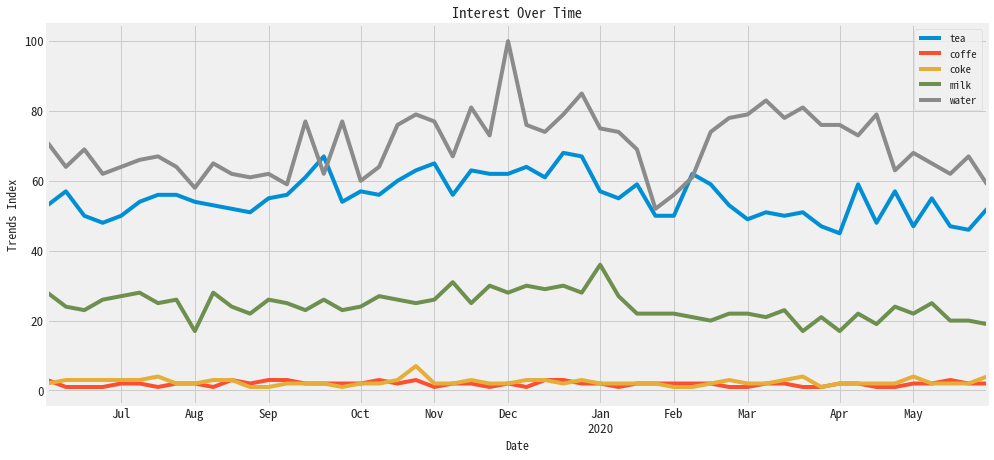

In [7]:
axes = interest_over_time_df.plot.line(
    figsize=(15,7),
    title='Interest Over Time')
axes.set_xlabel('Date')
axes.set_ylabel('Trends Index')
axes.tick_params(axis='both', which='major', labelsize=13)

### Google Keyword Suggestions

Return a list of additional suggested keywords that can be used to refine a trend search.

```python
"""Request data from Google's Keyword Suggestions dropdown and return a dictionary"""
TrendReq.suggestions(self, keyword)
```

- Parameters:
    - `keyword`:
        - keyword to get suggestions for

In [8]:
keywords = pytrend.suggestions(keyword='beer')
keywords_df = pd.DataFrame(keywords)
keywords_df.drop(columns='mid') # This column makes no sense

,title,type
0,Beer,Alcoholic drink
1,Brewery,Topic
2,Drink coaster,Topic
3,Bears,Animal
4,Brewer's yeast,Fungus


### Related Queries

當使用者搜尋某個主題時，他們也會搜尋相關的內容

Return data for the related keywords to a provided keyword shown on Google Trends' Related Queries section.

```python
"""Request data from Google's Related Queries section and reutrn a dictionary of dataframe

If not top and/or rising related queries are found, 
the value for the key "top" and/or "rising" will be None
"""
TrendReq.related_queries(self)
```

- Returns: dictionary of pandas.DataFrames

In [9]:
pytrend.build_payload(kw_list=['Coronavirus'])

In [10]:
# Related Queries, return a dictionary of dataframe
related_queries = pytrend.related_queries()
related_queries

{'Coronavirus': {'top':                             query  value
  0              taiwan coronavirus    100
  1                          taiwan     94
  2              coronavirus update     64
  3               coronavirus cases     52
  4                  coronavirus 中文     37
  5   thank you coronavirus helpers     33
  6                coronavirus news     31
  7                          corona     28
  8                  coronavirus us     27
  9                 coronavirus map     26
  10                          武漢 肺炎     26
  11              china coronavirus     24
  12               coronavirus tips     21
  13              world coronavirus     20
  14               coronavirus live     17
  15                coronavirus usa     17
  16                             疫情     15
  17                new coronavirus     15
  18          coronavirus in taiwan     14
  19              wuhan coronavirus     14
  20        coronavirus worldometer     13
  21       taiwan coronavirus ca

In [11]:
COVID_19 = related_queries['Coronavirus']['top']
COVID_19

,query,value
0,taiwan coronavirus,100
1,taiwan,94
2,coronavirus update,64
3,coronavirus cases,52
4,coronavirus 中文,37
5,thank you coronavirus helpers,33
6,coronavirus news,31
7,corona,28
8,coronavirus us,27
9,coronavirus map,26


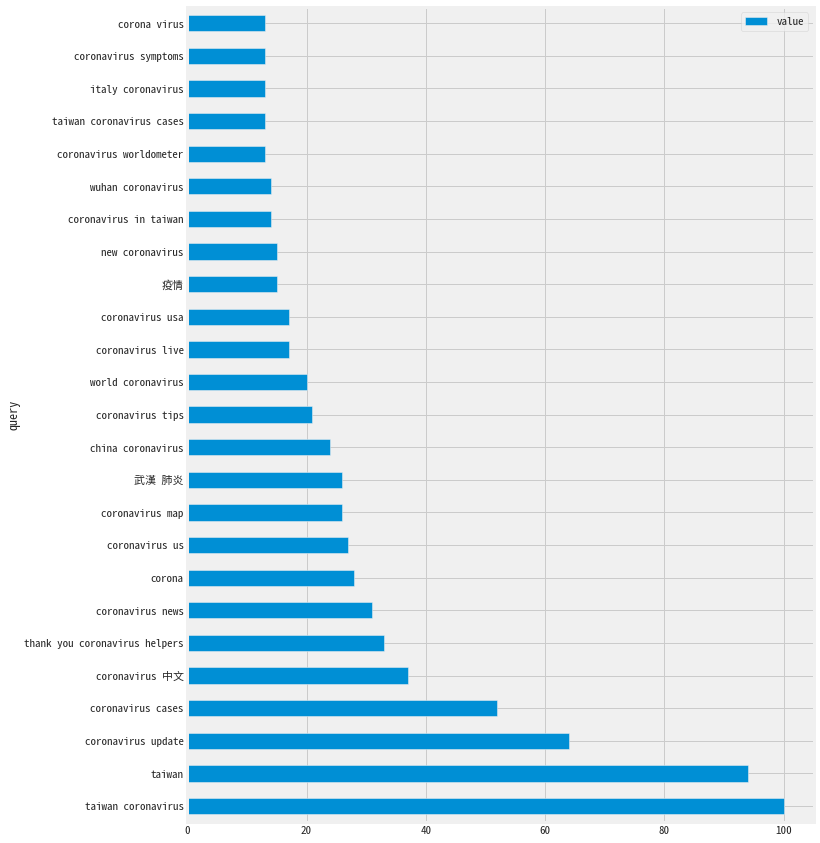

In [12]:
axes = COVID_19.plot.barh(x='query', y='value', figsize=(10,15))

## The Search Trends of COVID-19 in 2020

In [13]:
pytrend.build_payload(kw_list=['Coronavirus'], timeframe='2020-01-01 2020-06-04')
covid_19_interest_over_time_df = pytrend.interest_over_time()
covid_19_interest_over_time_df.head()

,Coronavirus,isPartial
date,,
2020-01-01,0,False
2020-01-02,0,False
2020-01-03,0,False
2020-01-04,0,False
2020-01-05,0,False


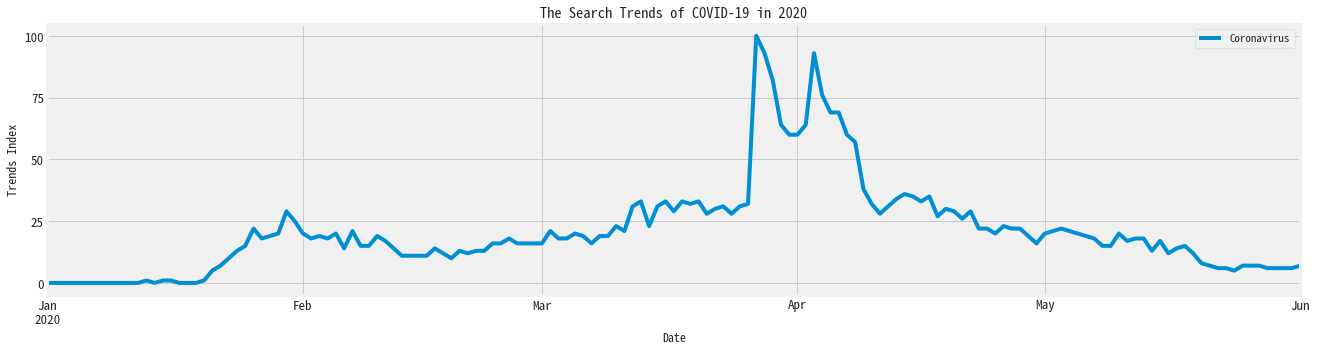

In [14]:
axes = covid_19_interest_over_time_df.plot.line(
    figsize=(20,5),
    title='The Search Trends of COVID-19 in 2020')
axes.set_yticks([0, 25, 50, 75, 100])
axes.set_xlabel('Date')
axes.set_ylabel('Trends Index')
axes.tick_params(axis='both', which='major', labelsize=13)